Importing the libraries needed and the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importing the dataframe of insurance
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To improve the modeling scores and reduce the error, new columns were created crossing information from different columns. 


In [3]:
# New column to divide the region into North or South
df['north_south'] = df['region'].str[:5]

# Bmi transformation into 2 differente columns
df['log_bmi']=np.log(df['bmi'])**2
df['square_bmi']=df['bmi']**2

# New column to divide the ages into elder (above 50 years) or not elders
elder=[]
for i in df['age']:
    if i > 50:
        elder.append(1)
    else:
        elder.append(0)
df['elder']=elder

# List converting information from the column 'smoker' to binary
smokerbin=[]
for i in df['smoker']:
    if i =='yes':
        smokerbin.append(1)
    else:
        smokerbin.append(0)
        
# New column to group people who are smokers and elders
df['smoker_elder']=smokerbin *df['elder']

# New column to divide people into obese (bmi above 30) and not obese
obese=[]
for i in df['bmi']:
    if i > 30:
        obese.append(1)
    else:
        obese.append(0)
df['obese']=obese

# New columns to group people who are smokers and obese, and who are elders and obese
df['smoker_obese']=smokerbin *df['obese']
df['elder_obese']=df['elder']*df['obese']
df.head()

,age,sex,bmi,children,smoker,region,charges,north_south,log_bmi,square_bmi,elder,smoker_elder,obese,smoker_obese,elder_obese
0,19,female,27.900,0,yes,southwest,16884.92400,south,11.079756,778.410000,0,0,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,south,12.387393,1140.412900,0,0,1,0,0
2,28,male,33.000,3,no,southeast,4449.46200,south,12.225565,1089.000000,0,0,1,0,0
3,33,male,22.705,0,no,northwest,21984.47061,north,9.750538,515.517025,0,0,0,0,0
4,32,male,28.880,0,no,northwest,3866.85520,north,11.310773,834.054400,0,0,0,0,0


In [5]:
# Correlation between features
df.corr()

,age,bmi,children,charges,log_bmi,square_bmi,elder,smoker_elder,obese,smoker_obese,elder_obese
age,1.000000,0.109272,0.042469,0.299008,0.114279,0.100717,0.768811,0.293425,0.086764,-0.002543,0.566355
bmi,0.109272,1.000000,0.012759,0.198341,0.995562,0.991400,0.102689,0.039151,0.799404,0.278088,0.352236
children,0.042469,0.012759,1.000000,0.067998,0.012966,0.012470,-0.104970,-0.008936,0.011283,0.002665,-0.043228
charges,0.299008,0.198341,0.067998,1.000000,0.199517,0.192981,0.239466,0.473054,0.199683,0.815375,0.230123
log_bmi,0.114279,0.995562,0.012966,0.199517,1.000000,0.974842,0.104173,0.039248,0.805301,0.278206,0.353785
square_bmi,0.100717,0.991400,0.012470,0.192981,0.974842,1.000000,0.098457,0.038407,0.772728,0.271768,0.341438
elder,0.768811,0.102689,-0.104970,0.239466,0.104173,0.098457,1.000000,0.372251,0.106440,-0.001713,0.734747
smoker_elder,0.293425,0.039151,-0.008936,0.473054,0.039248,0.038407,0.372251,1.000000,0.030007,0.351583,0.260535
obese,0.086764,0.799404,0.011283,0.199683,0.805301,0.772728,0.106440,0.030007,1.000000,0.329069,0.419193
smoker_obese,-0.002543,0.278088,0.002665,0.815375,0.278206,0.271768,-0.001713,0.351583,0.329069,1.000000,0.094063


As we can see, there is a positive correlation between charges and the other features. The strongest correlations are the groups: smoker and obese; smoker and elder & age.

In [7]:
# Defining EDA function
def EDA (df):
    eda_df = {}
    eda_df['Amount_NaN'] = df.isnull().sum()
    eda_df['%_NaN'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    eda_df['Amount_Data'] = df.count()
    
    
    colunas = sorted(df.columns.tolist(), key=str.lower, reverse=False)
    eda_df['Amount_Unique'] = filtered_result = list(map(lambda x: len(df[x].unique().tolist()), colunas))
    
    eda_df['Mean'] = np.round(df.mean(), 2)
    eda_df['Median'] = np.round(df.median(), 2)
    
    eda_df['Max'] = df.max()
    eda_df['Min'] = df.min()
    eda_df['STD'] = np.round(df.std(), 2)
    
    return pd.DataFrame(eda_df)

In [8]:
EDA(df)

,Amount_NaN,%_NaN,DType,Amount_Data,Amount_Unique,Mean,Median,Max,Min,STD
age,0,0.0,int64,1338,47,39.21,39.00,64,18,14.05
bmi,0,0.0,float64,1338,548,30.66,30.40,53.13,15.96,6.10
charges,0,0.0,float64,1338,1337,13270.42,9382.03,63770.42801,1121.8739,12110.01
children,0,0.0,int64,1338,6,1.09,1.00,5,0,1.21
elder,0,0.0,int64,1338,2,0.27,0.00,1,0,0.44
elder_obese,0,0.0,int64,1338,2,0.16,0.00,1,0,0.37
log_bmi,0,0.0,float64,1338,548,11.62,11.66,15.782677,7.673374,1.37
north_south,0,0.0,object,1338,2,NaN,NaN,south,north,NaN
obese,0,0.0,int64,1338,2,0.53,1.00,1,0,0.50
region,0,0.0,object,1338,4,NaN,NaN,southwest,northeast,NaN


There are no missing values on the columns. So let's check the data distribution in Graphs. Above, there is a Boxplot integrated with a Histogram for charges. We have some outliers on the right, that's why the mean is higher than the median for this distribution. No outliers will be removed from the dataset, because removing them on this case has resulted in higher errors.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

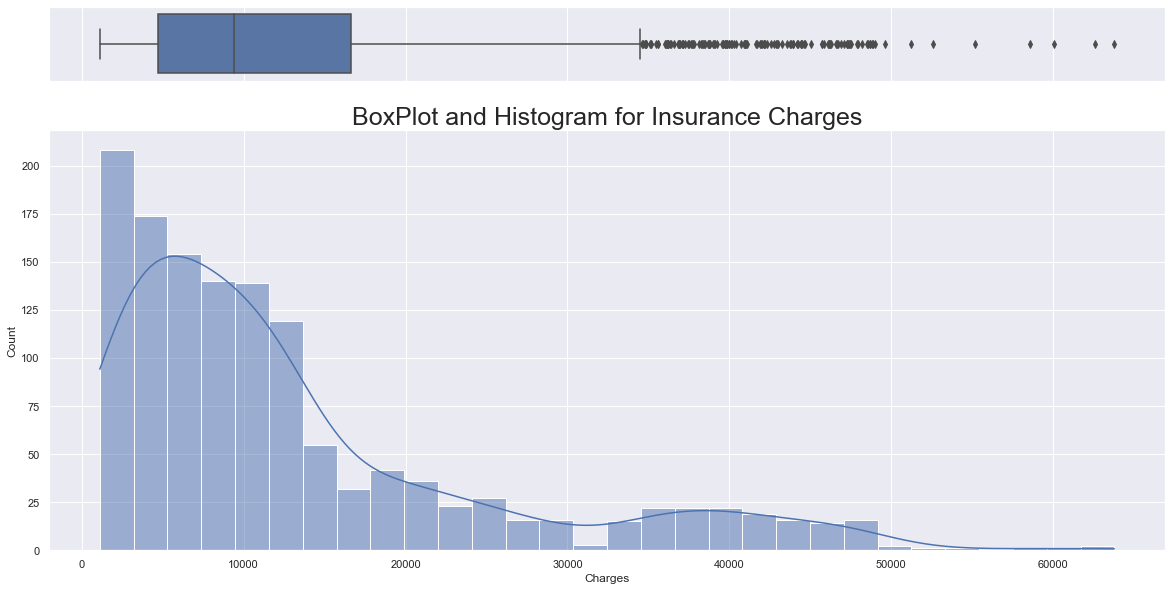

In [19]:
import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(df["charges"], ax=ax_box)
sns.histplot(data=df, x="charges", ax=ax_hist,kde=True)
plt.title('BoxPlot and Histogram for Insurance Charges',fontsize=25)
plt.xlabel('Charges')
plt.ylabel('Count')
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

After that, is needed to import the preprocessing and modeling tools. 

In [16]:


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

import category_encoders as ce

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

To test differente Scalers and Encoders, a list of scalers and encoders were created.

In [21]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error

# List of scalers
scalers_list = [MinMaxScaler(),StandardScaler(),RobustScaler(),QuantileTransformer(),MaxAbsScaler()] 
 
# List of encoders
encoders_list = [ce.BackwardDifferenceEncoder(),
                 ce.BaseNEncoder(),
                 ce.BinaryEncoder(),
                 ce.CatBoostEncoder(),
                 ce.GLMMEncoder(),
                 ce.HelmertEncoder(),
                 ce.JamesSteinEncoder(),
                 ce.LeaveOneOutEncoder(),
                 ce.MEstimateEncoder(),
                 ce.OneHotEncoder(),
                 ce.OrdinalEncoder(),
                 ce.SumEncoder(),
                 ce.PolynomialEncoder(),
                 ce.TargetEncoder(),
                ]

So, it was possible to perform loops to test all combinations of Scalers and Encoders. A dataframe was resulted, with the Encoder, Scaler, Score and Root Mean Squared Error, sorted by Score. 
The model was performed using a Pipeline of preprocessing (encoding for categorical features and scaling for all features) and model fitting (using training data, 30% of total data).

In [22]:
encoders=[]
scalers=[]
scores=[]
rmse=[]

for i in scalers_list:
    for j in encoders_list:
    
        numeric_features = [ 'age','bmi','children','log_bmi','square_bmi',
                            'elder','smoker_elder','obese','smoker_obese','elder_obese' #,'transf_age'
                           ]
        numeric_transformer = Pipeline(steps=[
                                      ('scaler', i)])


        categorical_features = ['region','sex','smoker','north_south' #, 'elder' #'sex_smoker' #,'west_east'
                               ]
        categorical_transformer = Pipeline(steps=[
        ('encoder', j)])

        preprocessor = ColumnTransformer(
        transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

        pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression())])

        X = df.drop('charges', axis = 1)
        y = df['charges']
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size=0.3)
        pipe.fit(X_train, y_train)
        scalers.append(i)
        encoders.append(j)
        scores.append(pipe.score(X_test, y_test))
        rmse.append((mean_squared_error(y_test, pipe.predict(X_test)))**0.5)
result = pd.DataFrame()
result['Scaler']=scalers
result['Encoder']=encoders
result['Score']=scores
result['RMSE']=rmse
result.sort_values(by='Score',ascending = False)

,Scaler,Encoder,Score,RMSE
46,QuantileTransformer(),GLMMEncoder(),0.899706,3999.227203
50,QuantileTransformer(),MEstimateEncoder(),0.899705,3999.257667
55,QuantileTransformer(),TargetEncoder(),0.899705,3999.258131
48,QuantileTransformer(),JamesSteinEncoder(),0.899703,3999.285993
49,QuantileTransformer(),LeaveOneOutEncoder(),0.899702,3999.317845
...,...,...,...,...
66,MaxAbsScaler(),OrdinalEncoder(),0.897661,4039.792808
59,MaxAbsScaler(),CatBoostEncoder(),0.897153,4049.806065
31,RobustScaler(),CatBoostEncoder(),0.897153,4049.806065
17,StandardScaler(),CatBoostEncoder(),0.897153,4049.806065


The best combination for Encoder and Scaler was: GLMM Encoder and Quantile Transformer. The model has a score of 0.8997 and a RMSE of 3999.23